<a href="https://colab.research.google.com/github/devopsopenshift/python/blob/main/coded_project/AUSTO-1-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description
**Age**: The age of the individual in years.

Gender: The gender of the individual, categorized as male or female.

Profession: The occupation or profession of the individual.

Marital_status: The marital status of the individual, such as married &, single

Education: The educational qualification of the individual Graduate and Post Graduate

No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

Salary: The individual's salary or income.

Partner_salary: The salary or income of the individual's partner, if applicable.

Total_salary: The total combined salary of the individual and their partner (if applicable).

Price: The price of a product or service.
Make: The type of automobile

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Sanity check

In [3]:
data = pd.read_csv('austo_automobile.csv',na_values=['missing','inf','nan'])

**checking duplicate data**

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [6]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### missing info partner salary

In [7]:
data['Partner_salary'].fillna(0,inplace=True)

In [8]:
data['Total_salary']=data['Salary']+data['Partner_salary']

In [9]:
data['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [10]:
data['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [11]:
data[data['Partner_salary']<=0]['Partner_working'].value_counts()

Partner_working
No     713
Yes     16
Name: count, dtype: int64

In [12]:
data['Partner_salary'].value_counts(dropna=False,normalize=True)

Partner_salary
0.000       0.461
40500.000   0.018
40200.000   0.017
40100.000   0.016
40000.000   0.016
             ... 
45800.000   0.001
27300.000   0.001
22900.000   0.001
23100.000   0.001
35000.000   0.001
Name: proportion, Length: 149, dtype: float64

In [13]:
data['Gender'].value_counts(dropna=False,normalize=True)

Gender
Male     0.758
Female   0.207
NaN      0.034
Femal    0.001
Femle    0.001
Name: proportion, dtype: float64

### fill missing  info men/women

In [14]:
data['Gender'].replace(["Femal", "Female", "Femle"],'Female',inplace=True)

In [15]:
data['Gender']=data['Gender'].map(lambda x : 'Female' if x in ["Femal", "Female", "Femle"] else x)

In [16]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Gender,53,3.352


In [17]:
data.shape

(1581, 14)

In [18]:
px.box(data,x='Total_salary',color='Make').show()

In [19]:
px.box(data,x='Salary',color='Make').show()

In [20]:
px.box(data,x='Partner_salary',color='Make').show()

In [21]:
data[data['Gender'].isnull()==True]['Education'].value_counts(normalize=True,dropna=False)

Education
Post Graduate   0.642
Graduate        0.358
Name: proportion, dtype: float64

In [22]:
data[data['Gender'].isnull()==True]['Make'].value_counts(normalize=True,dropna=False)

Make
Sedan       0.849
SUV         0.113
Hatchback   0.038
Name: proportion, dtype: float64

#### check negative values

In [23]:
ndata=data._get_numeric_data()
ndata[ndata<0].count()

Age                 0
No_of_Dependents    0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 173.0+ KB


In [25]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [26]:
data['Gender'].replace(["Femal", "Female", "Femle"],'Woman',inplace=True)

In [27]:
data['Gender'].replace(["Male"],'Man',inplace=True)

#### missing data

In [28]:
data.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [29]:
data['Gender'].fillna('Man',inplace=True)

## Analysis

### statistical summary catagorical

In [30]:
data.describe(include='object').T

,count,unique,top,freq
Gender,1581,2,Man,1252
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


### stastical summary numerical

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.000,31.922,8.426,22.000,25.000,29.000,38.000,54.000
No_of_Dependents,1581.000,2.458,0.943,0.000,2.000,2.000,3.000,4.000
Salary,1581.000,60392.220,14674.825,30000.000,51900.000,59500.000,71800.000,99300.000
Partner_salary,1581.000,18869.513,19570.644,0.000,0.000,24900.000,38000.000,80500.000
Total_salary,1581.000,79261.733,25375.828,30000.000,60400.000,77700.000,95600.000,171000.000
Price,1581.000,35597.723,13633.637,18000.000,25000.000,31000.000,47000.000,70000.000


In [32]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Man,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000.000,61000,SUV
1,53,Woman,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800.000,61000,SUV
2,53,Woman,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000.000,57000,SUV
3,53,Woman,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800.000,61000,SUV
4,53,Man,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900.000,57000,SUV


In [33]:
data['index']=data.index+1

### Univariate analysis

In [34]:
data.index

RangeIndex(start=0, stop=1581, step=1)

In [35]:
data.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make', 'index'],
      dtype='object')

#### distribution

#### Gender preferences

In [36]:
# @title Box plot on price basis by Make
catgmplotm=lambda x: px.box(data, x=x,y="Price", color="Make")

In [37]:
# @title Box plot on price basis
expencesByVariable=lambda x: px.box(data, x=x,y="Price")
## px.box(data, x=x,y="Price")

In [38]:
expencesByVariable('Gender')

###### checking expediture Men/Women had  by  pivoting
Q4. How does the amount spent on purchasing automobiles vary by gender?

---




Overall expenditure on purchases are higher by women compared to men, expenditure on purchases vary by make of automobile.
*   Expenditures on SUV purchases by men are comparatively high than those by women.
  * 77% of men paid upto 64k for SUV, whereas 75% women paid less than 62k for SUV.
  * minimum pay from men for SUV is 49k, while that from women is 31k
  * Average expenditrue on SUV by men is 59096.774 and that by women is 53479.769
*   Women have spend more on Sedan as compared to Men
  * 53% of women paid upto 43k, whereas 50% men paid upto 31k
  * minimum pay women for sedan 31k, while men paid minimum 18k for Sedan
  * Average expenditure on sedan purchase by women is 42773 as compared to 32550 by men
*  Overall expenditures on Hatchback purchase are same between Men and Women they don't differ more than 2k



In [39]:
data[(data['Gender']=='Man') & (data['Make']=='SUV') &(data['Price']<=64000)][['Price']].count()/126

Price   0.778
dtype: float64

In [40]:
data[(data['Gender']=='Woman') & (data['Make']=='Sedan') &(data['Price']<=43000)][['Price']].count()/141

Price   0.532
dtype: float64

In [41]:
quantile_data=data.groupby(['Gender','Make'])['Price'].describe()
quantile_data

count      mean       std       min       25%       50%  \
Gender Make                                                                  
Man    Hatchback 567.000 26447.972  4292.366 18000.000 23000.000 26000.000   
       SUV       124.000 59096.774  5946.126 49000.000 54000.000 59000.000   
       Sedan     561.000 32550.802 11023.903 18000.000 23000.000 31000.000   
Woman  Hatchback  15.000 27466.667  4240.395 20000.000 24000.000 28000.000   
       SUV       173.000 53479.769 10378.079 31000.000 49000.000 55000.000   
       Sedan     141.000 42773.050  7248.023 31000.000 37000.000 43000.000   

                       75%       max  
Gender Make                           
Man    Hatchback 30000.000 33000.000  
       SUV       64000.000 70000.000  
       Sedan     42000.000 55000.000  
Woman  Hatchback 31500.000 33000.000  
       SUV       62000.000 69000.000  
       Sedan     49000.000 55000.000

In [42]:
table=pd.pivot_table(data, values=['Price'],index=['Gender'], columns=['Make'],
                     aggfunc={'Price':lambda p:np.nanquantile(p,0.75)}, margins=True)
table.stack(['Make']).T

Gender       Man                                   Woman                      \
Make         All Hatchback       SUV     Sedan       All Hatchback       SUV   
Price  37000.000 30000.000 64000.000 42000.000 55000.000 31500.000 62000.000   

Gender                 All                                
Make       Sedan       All Hatchback       SUV     Sedan  
Price  49000.000 47000.000 30000.000 63000.000 44000.000

In [43]:
lst_num_var =   ['Gender']

plots=( catgmplotm(n) for n in lst_num_var )
for plot in plots:
    plot.show()

In [44]:
data['Make'].value_counts(normalize=True)

Make
Sedan       0.444
Hatchback   0.368
SUV         0.188
Name: proportion, dtype: float64

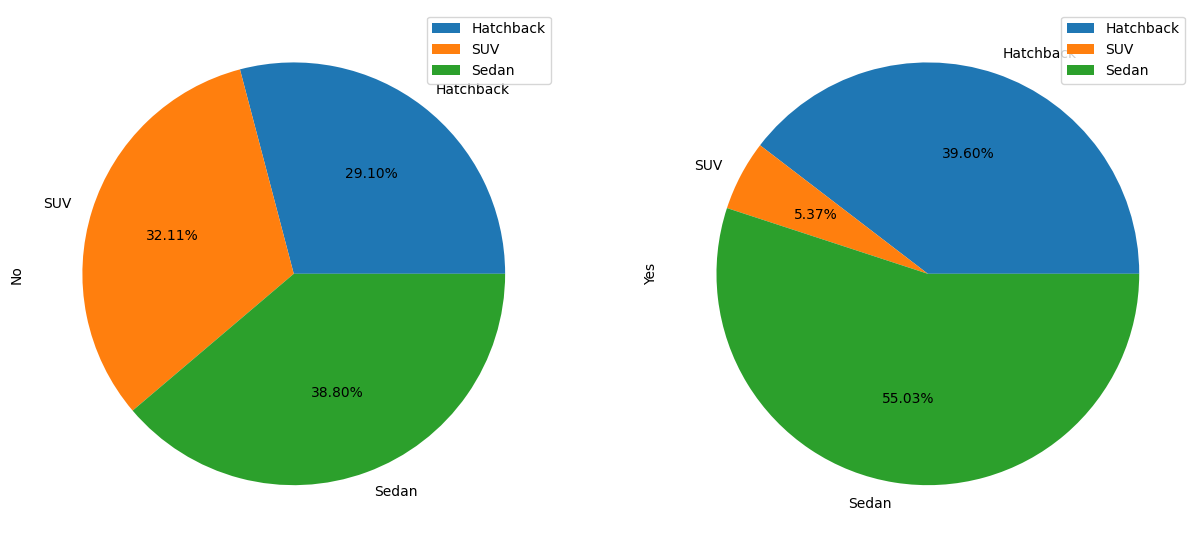

In [45]:
salaried_persons = data[(data['Profession']=='Salaried')]
crosstb = pd.crosstab(salaried_persons.Make, salaried_persons.House_loan)

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

plt.show()

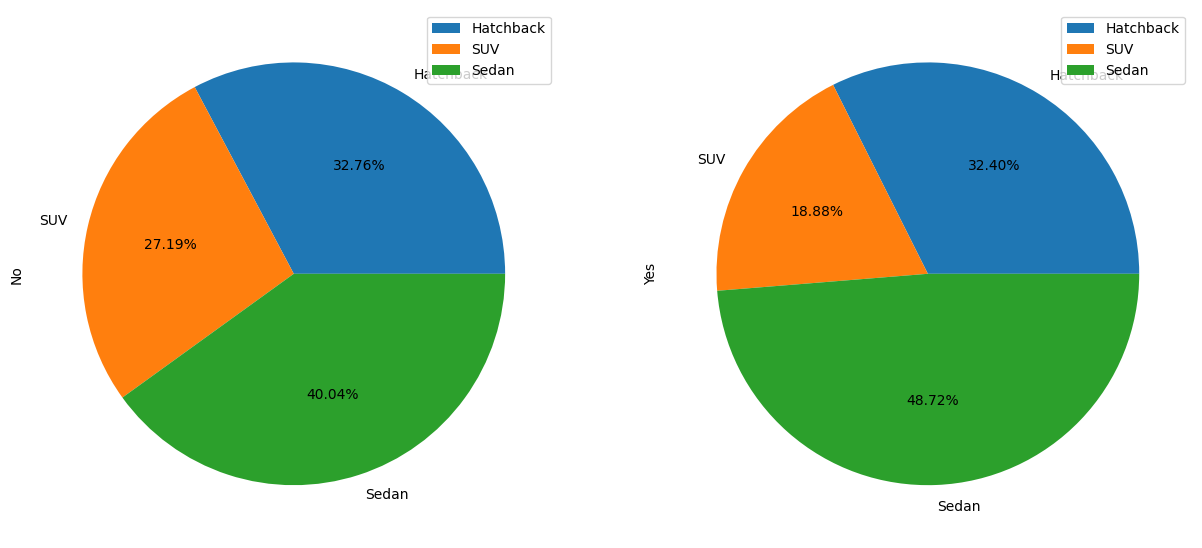

In [46]:
salaried_persons = data[(data['Profession']=='Salaried')]
crosstb = pd.crosstab(salaried_persons.Make, salaried_persons.Personal_loan)

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

plt.show()

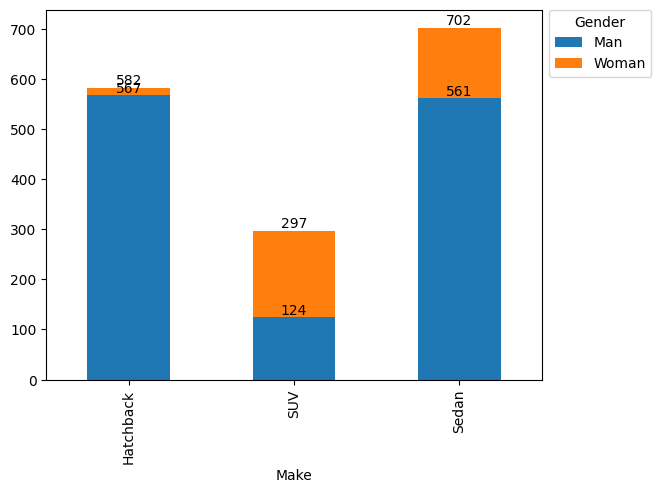

In [47]:
crosstb = pd.crosstab(data.Make, data.Gender)

# Creating barplot
ax = crosstb.plot(kind="bar", stacked=True, rot=90)
ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    # set the bar label
    ax.bar_label(c, label_type='edge')



- 173  Women prefer SUV over men 124, i.e. 58% of total SUVs buyers
- Although Men tend to puchase comparatively expensive SUVs than women
  - Men have bought SUV with mostly price =  57000, whereas most purchase price from women is  51000
  - 75% women purchase SUV at cost not above 62000, whereas 75% men purchase SUV at cost upto 64000

In [48]:
data[(data['Make']=='SUV') & (data['Gender']=='Male')]['Price'].mode()

Series([], Name: Price, dtype: int64)

In [49]:
data[(data['Make']=='SUV') & (data['Gender']=='Male')]['Price'].describe(include='All')

count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: Price, dtype: float64

In [50]:
data[(data['Make']=='SUV') & (data['Gender']=='Female')]['Price'].mode()

Series([], Name: Price, dtype: int64)

In [51]:
data[(data['Make']=='SUV') & (data['Gender']=='Female')]['Price'].describe(include='All')


count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: Price, dtype: float64

In [52]:
data[(data['Make']=='SUV')].groupby(['Gender','Profession'])['index'].count()/(data[(data['Make']=='SUV')]['index'].count())*100

Gender  Profession
Man     Business     11.448
        Salaried     30.303
Woman   Business     18.519
        Salaried     39.731
Name: index, dtype: float64

###### Sheldon Cooper's claim : salaried male is an easier target for a SUV sale over a Sedan

* Women are 58% of purchasers of SUVs
* Salaried Men are 30% of SUVs purchasers
* out of Salaried people, mens are  only 13%  to purchase SUVs, whereas 45.39% mens are probable to purchase Sedan

Thus data doesn't support this claim !!

In [53]:
salaried_persons['Make'].value_counts(normalize=True)

Make
Sedan       0.442
Hatchback   0.326
SUV         0.232
Name: proportion, dtype: float64

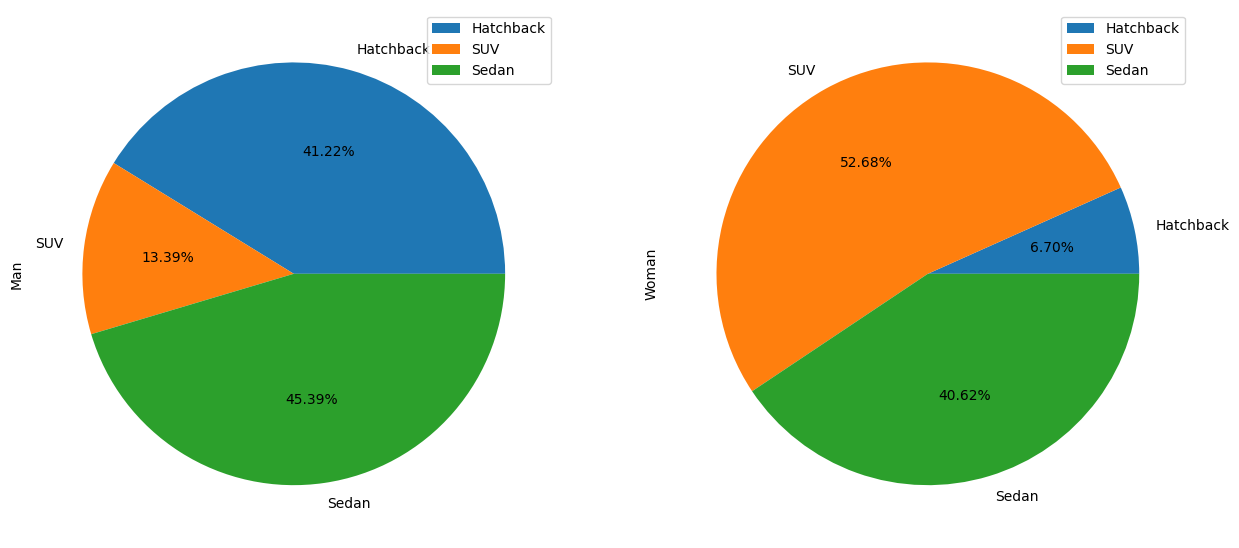

In [54]:
crosstb = pd.crosstab(salaried_persons.Make, salaried_persons.Gender)

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')



plt.show()

In [55]:
salaried_persons=data[(data['Profession']=='Salaried')]

In [56]:
SUVpurchasers=data[(data['Make']=='SUV')]

Women are in higher percentage over Men irrespective of Profession.

*   Salaried Men are just 43.27 % probable to buy SUV
*   List item



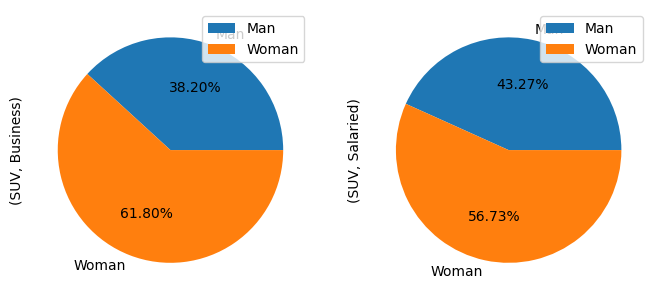

In [57]:
crosstb = pd.crosstab(SUVpurchasers.Gender, [SUVpurchasers.Make,SUVpurchasers.Profession])

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(8, 12),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left'

plt.show()

In [58]:
salaried_persons['Gender'].value_counts(normalize=True)

Gender
Man     0.750
Woman   0.250
Name: proportion, dtype: float64

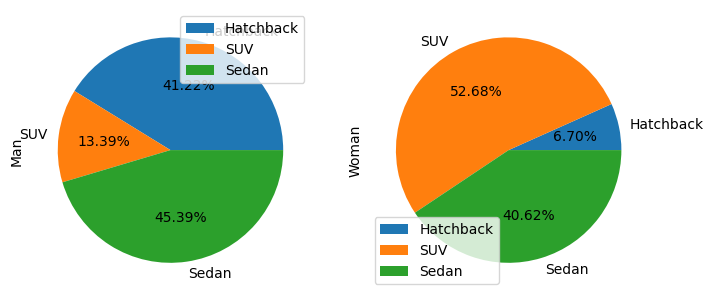

In [59]:
crosstb = pd.crosstab(salaried_persons.Make, [salaried_persons.Gender])

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(8, 12),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left'

plt.show()

In [60]:
total=data[(data['Make']=='SUV')]['index'].count()

In [61]:
table=pd.pivot_table(data[(data['Make']=='SUV')], values=['index'],index=['Gender'], columns=['Profession'], aggfunc={ "index" : (lambda c : np.count_nonzero(c) / total)}, margins=True)
table.stack('Profession')

index
Gender Profession       
Man    All         0.418
       Business    0.114
       Salaried    0.303
Woman  All         0.582
       Business    0.185
       Salaried    0.397
All    All         1.000
       Business    0.300
       Salaried    0.700


#### Q5. How much money was spent on purchasing automobiles by indivduals who took personal loan

In [62]:
expencesByVariable('Personal_loan')

Overall Personal Loan borrowers expend relatively less money on SUV but more on Sedan purchase.
 *  75% borrowers expend below 61k whereas 79%  non borrowers expend upto 64k on SUV purchase.
 * 50% borrowers expend below 53k whereas 50%  non borrowers expend upto 58k on SUV purchase.
 *  76% borrowers expend upto 45k whereas 75% non borrowers below 43k on Sedan purchase.
 * Average expenditure on SUV purchase by non-borrowers is 57309.392, which that of borrowers is  53508.621

 * Average expenditure on Sedan purchase by non-borrowers is 34233.438, while that by borrowers is  34909.091.

 * Expenditure of money on purchase of hatchback is similar between borrowers and non borrowers

In [63]:
SUVpurchasersBorrowers = data[(data['Personal_loan']=='Yes') & (data['Make']=='SUV')]

In [82]:
SUVpurchasersNonBorrowers = data[(data['Personal_loan']=='No') & (data['Make']=='SUV')]

In [88]:
SedanpurchasersNonBorrowers = data[(data['Personal_loan']=='No') & (data['Make']=='Sedan')]

In [87]:
SedanpurchasersBorrowers = data[(data['Personal_loan']=='Yes') & (data['Make']=='Sedan')]

In [120]:
SUVpurchasersBorrowers[['Price']].mode()

,Price
0,51000


In [121]:
SUVpurchasersNonBorrowers[['Price']].mode()

,Price
0,57000


In [99]:
SedanpurchasersBorrowers[['Price']].mode()

,Price
0,23000


In [100]:
SedanpurchasersNonBorrowers[['Price']].mode()

,Price
0,31000


In [101]:
from collections import Counter
Counter(SedanpurchasersNonBorrowers['Price']).most_common()

[(31000, 21),
 (21000, 18),
 (23000, 17),
 (18000, 17),
 (27000, 15),
 (19000, 13),
 (39000, 12),
 (53000, 11),
 (33000, 11),
 (20000, 11),
 (26000, 11),
 (47000, 9),
 (34000, 9),
 (32000, 9),
 (48000, 9),
 (35000, 9),
 (37000, 8),
 (43000, 8),
 (54000, 7),
 (50000, 7),
 (44000, 7),
 (42000, 7),
 (38000, 7),
 (24000, 7),
 (49000, 6),
 (36000, 6),
 (28000, 6),
 (52000, 5),
 (40000, 5),
 (41000, 5),
 (51000, 5),
 (45000, 5),
 (46000, 5),
 (29000, 4),
 (55000, 3),
 (22000, 1),
 (30000, 1)]

In [119]:
his = px.histogram(SedanpurchasersBorrowers, x="Price",color="House_loan", pattern_shape="Gender")
his.show()

In [117]:
his = px.histogram(SedanpurchasersNonBorrowers, x="Price",text_auto=True,opacity=0.5)
his.show()

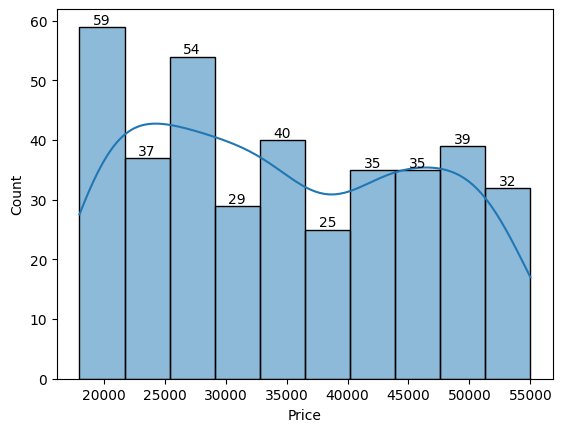

In [113]:
y=sns.histplot(data=SedanpurchasersBorrowers, x='Price', kde=True);
y.bar_label(y.containers[0])
plt.show()

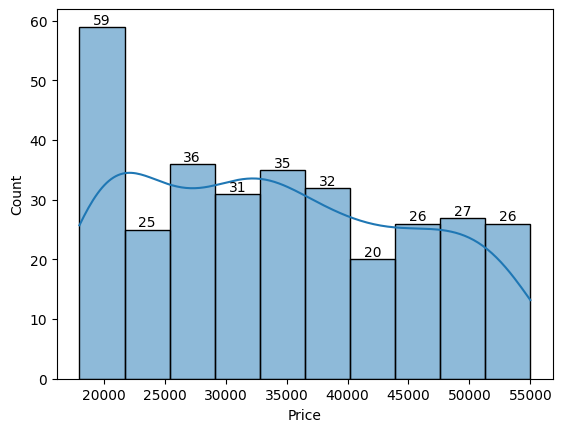

In [114]:
y=sns.histplot(data=SedanpurchasersNonBorrowers, x='Price', kde=True);
y.bar_label(y.containers[0])
plt.show()

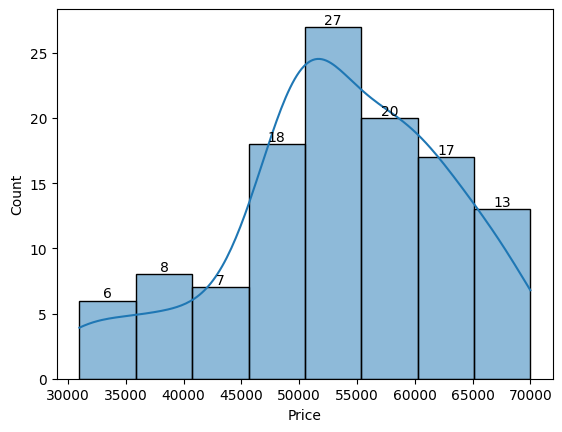

In [108]:
# @title Plot of SUV borrowers
y=sns.histplot(data=SUVpurchasersBorrowers, x='Price', kde=True)
y.bar_label(y.containers[0]);
plt.show()

In [85]:
# @title Mode : SUV , burrowers
SUVpurchasersBorrowers[['Price']].mode()

,Price
0,51000


In [86]:
SUVpurchasersNonBorrowers[['Price']].mode()

,Price
0,57000


In [96]:
from collections import Counter
Counter(SUVpurchasersNonBorrowers['Price']).most_common()[1]

(61000, 12)

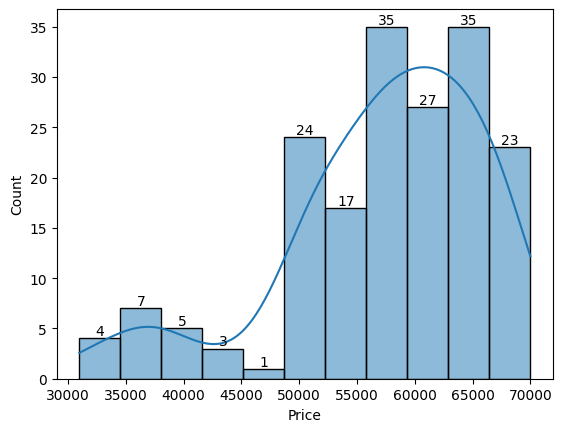

In [110]:
# @title Plot of SUV non borrowers
y=sns.histplot(data=SUVpurchasersNonBorrowers, x='Price', kde=True);
y.bar_label(y.containers[0])
plt.show()

In [64]:
data[(data['Personal_loan']=='No') & (data['Make']=='SUV') &(data['Price']<=58000)][['Price']].count()/181

Price   0.503
dtype: float64

In [65]:
data.groupby(['Personal_loan','Make'])[['Price']].transform('rank',pct=True)

,Price
0,0.610
1,0.772
2,0.409
3,0.772
4,0.409
...,...
1576,0.479
1577,0.789
1578,0.708
1579,0.354


In [66]:
quantile_data=data.groupby(['Personal_loan','Make'])['Price'].describe()
quantile_data

count      mean       std       min       25%  \
Personal_loan Make                                                        
No            Hatchback 291.000 26683.849  4358.469 18000.000 23000.000   
              SUV       181.000 57309.392  8799.834 31000.000 53000.000   
              Sedan     317.000 34233.438 11111.450 18000.000 24000.000   
Yes           Hatchback 291.000 26264.605  4218.443 19000.000 23000.000   
              SUV       116.000 53508.621  9414.601 31000.000 49000.000   
              Sedan     385.000 34909.091 11190.795 18000.000 26000.000   

                              50%       75%       max  
Personal_loan Make                                     
No            Hatchback 28000.000 30000.000 33000.000  
              SUV       58000.000 64000.000 70000.000  
              Sedan     33000.000 43000.000 55000.000  
Yes           Hatchback 26000.000 30000.000 33000.000  
              SUV       53000.000 61000.000 70000.000  
              Sedan     34000.000 45000.000 55000.000

In [67]:
table=pd.pivot_table(data, values=['Price'],index=['Personal_loan'], columns=['Make'],
                     aggfunc={'Price':lambda p:np.nanquantile(p,0.75)}, margins=True)
table.stack(['Make']).T

Personal_loan        No                                     Yes            \
Make                All Hatchback       SUV     Sedan       All Hatchback   
Price         49000.000 30000.000 64000.000 43000.000 45000.000 30000.000   

Personal_loan                           All                                
Make                SUV     Sedan       All Hatchback       SUV     Sedan  
Price         61000.000 45000.000 47000.000 30000.000 63000.000 44000.000

In [68]:
lst_num_var =   ['Personal_loan']

plots=( catgmplotm(n) for n in lst_num_var )
for plot in plots:
    plot.write_html('Personal_loan.html')
    plot.show()

#### Are salaried persons tend to buy sedan



*   44.20% of salaried person are likelihood to buy Sedan
*   57.72% of salaried person who owe both personal and house loan buy Seda
*   43.9% of salaried only personal loan borrower
*   52.35%  salaried only house loan borrower

This indicates that upto 0.5 probability that salaried person will buy sedan and out of this population those who owe house loan are 0.41 probable  to buy Hatchback





In [69]:
def plotpie(make):
  crosstb = pd.crosstab(make.Make, [make.Profession])

# Creating barplot
  ax = crosstb.plot(kind="pie", subplots=True,   figsize=(8, 12),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left'

  plt.show()

In [70]:
salaried_persons=data[(data['Profession']=='Salaried')]


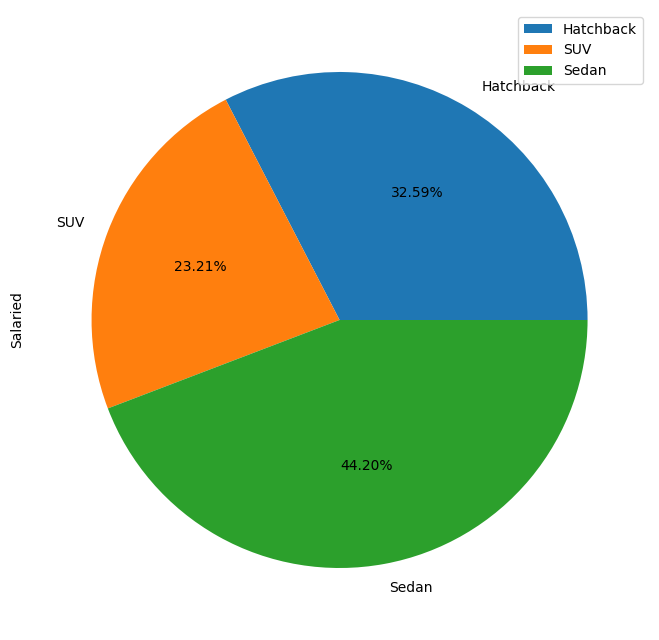

In [71]:
crosstb = pd.crosstab(salaried_persons.Make, [salaried_persons.Profession])

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(8, 12),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left'

plt.show()

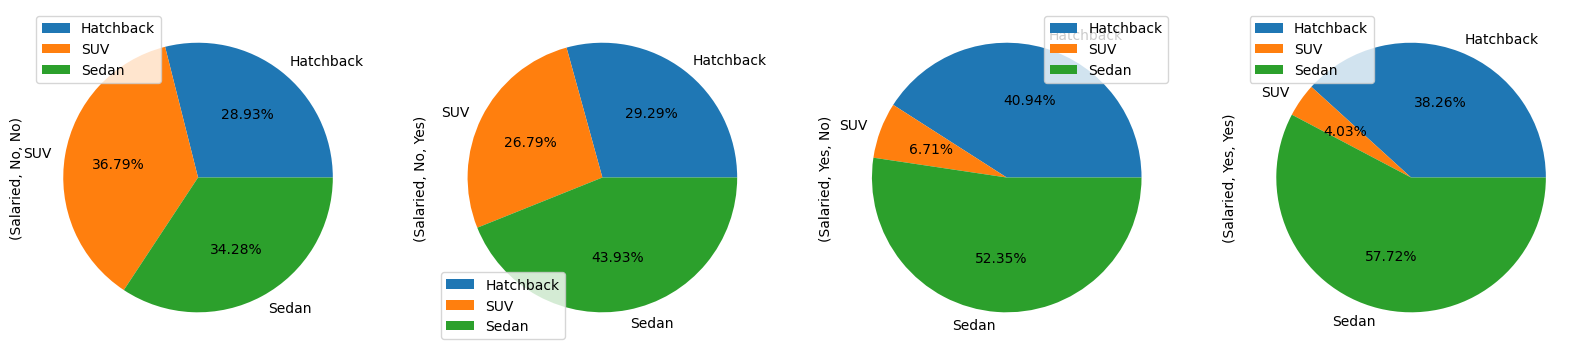

In [72]:
crosstb = pd.crosstab(salaried_persons.Make, [salaried_persons.Profession,salaried_persons.House_loan,salaried_persons.Personal_loan])

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(20, 20),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left'

plt.show()

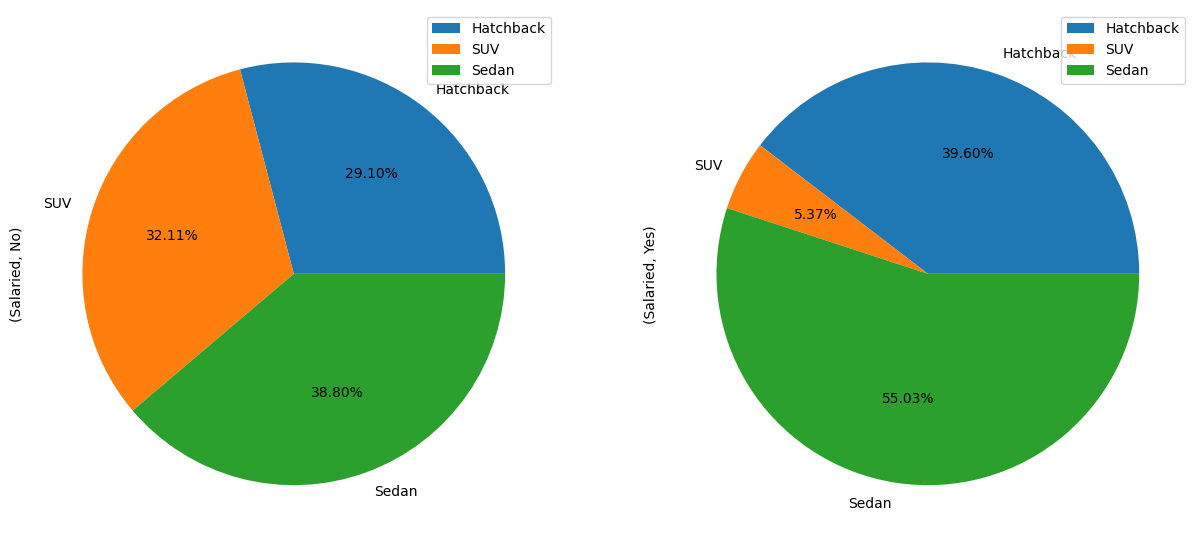

In [73]:
crosstb = pd.crosstab(salaried_persons.Make, [salaried_persons.Profession,salaried_persons.House_loan])

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left'

plt.show()

In [74]:
table=pd.pivot_table(data, values=['Price'],index=['Gender'], columns=['Make'],
                     aggfunc="sum", margins=True)
table.stack('Make')

Price
Gender Make               
Man    All        40585000
       Hatchback  14996000
       SUV         7328000
       Sedan      18261000
Woman  All        15695000
       Hatchback    412000
       SUV         9252000
       Sedan       6031000
All    All        56280000
       Hatchback  15408000
       SUV        16580000
       Sedan      24292000

In [75]:
table=pd.pivot_table(data[(data['Profession']=='Salaried')], values=['index'],index=['Make'], columns=['Gender'],
                     aggfunc={ "index" : (lambda c : np.count_nonzero(c) / data[(data['Profession']=='Salaried')]['index'].count())}, margins=True)
table.stack('Gender')

index
Make      Gender       
Hatchback All     0.326
          Man     0.309
          Woman   0.017
SUV       All     0.232
          Man     0.100
          Woman   0.132
Sedan     All     0.442
          Man     0.340
          Woman   0.102
All       All     1.000
          Man     0.750
          Woman   0.250

In [76]:
table=pd.pivot_table(data[(data['Profession']=='Salaried')], values=['index'],index=['Make'], columns=['House_loan'],
                     aggfunc={ "index" : (lambda c : np.count_nonzero(c) / data[(data['Profession']=='Salaried')]['index'].count())}, margins=True)
table.stack('House_loan')

index
Make      House_loan       
Hatchback All         0.326
          No          0.194
          Yes         0.132
SUV       All         0.232
          No          0.214
          Yes         0.018
Sedan     All         0.442
          No          0.259
          Yes         0.183
All       All         1.000
          No          0.667
          Yes         0.333

##### by price plot of catagorical variables

In [77]:
lst_num_var =   ['Gender', 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working']

plots=( catgmplotm(n) for n in lst_num_var )
for plot in plots:
    plot.show()

#### Q6. How does having a working partner influene the purchase of higher-price cars?

In [78]:
catgmplotm('Partner_working')

### Make preferences

In [79]:
data['Make'].value_counts(normalize=True)

Make
Sedan       0.444
Hatchback   0.368
SUV         0.188
Name: proportion, dtype: float64

##### Are salaried likelihood to buy sedan

1. 44 % salaried prefer Sedan and 33 % prefer Hatckback, whereas 23 % prefer SUV
2. Average Sedan buy is 55586.538






In [80]:
data.groupby(['Make','Profession'])['Price'].describe()

count      mean       std       min       25%  \
Make      Profession                                                   
Hatchback Business   290.000 26306.897  4349.636 18000.000 22000.000   
          Salaried   292.000 26640.411  4231.791 18000.000 23000.000   
SUV       Business    89.000 56382.022  9878.242 31000.000 52000.000   
          Salaried   208.000 55586.538  8935.205 31000.000 51000.000   
Sedan     Business   306.000 33333.333 11216.498 18000.000 23000.000   
          Salaried   396.000 35585.859 11016.223 18000.000 26000.000   

                           50%       75%       max  
Make      Profession                                
Hatchback Business   26000.000 30000.000 33000.000  
          Salaried   27000.000 30000.000 33000.000  
SUV       Business   59000.000 63000.000 70000.000  
          Salaried   57000.000 62250.000 70000.000  
Sedan     Business   31000.000 43000.000 55000.000  
          Salaried   35000.000 45000.000 55000.000

In [81]:
## total percentage
data.groupby(['Make','af'])['Gender'].count()/1580*100

KeyError: 'af'

In [ ]:
total_salaried_professionals=data[(data['Profession']=='Salaried')].count()[0]

In [ ]:
data[(data['Profession']=='Salaried')].groupby(['Make'])['Price'].count()/total_salaried_professionals*100

In [ ]:
catgplot = lambda p : px.box(data,x=p,y='Price',color='Make')

In [ ]:
##outliers
##catgplot('Partner_working').show()
##catgplot('Personal_loan').show()
catgplot('Make').show()



#### proove married male is easy targetted for  SUV over sedan?

SUV % is less than Sedan % which rather comparatively married women have bought more % of SUV (10.506). Most of the married men prefer either Hatchback of Sedan

In [ ]:
total_married_men=data[(data['Marital_status']=='Married')& (data['Gender']=='Male')].count()[0]

In [ ]:
## married men make preferences
data[(data['Marital_status']=='Married')& (data['Gender']=='Male')].groupby(['Make'])['Price'].count()/total_married_men*100

In [ ]:
##single men make preferences
data[(data['Marital_status']=='Single')& (data['Gender']=='Male')].groupby(['Make'])['Price'].count()/data[(data['Marital_status']=='Single')& (data['Gender']=='Male')].count()[0]*100

In [ ]:
data[data['Marital_status']=='Married'].groupby(['Make','Gender'])['Make'].count()/1580*100

In [ ]:
data[(data['Marital_status']=='Married')& (data['Gender']=='Male')].groupby(['Make'])['Price'].describe()

In [ ]:
data[(data['Marital_status']=='Single')& (data['Gender']=='Male')].groupby(['Make'])['Price'].describe()

In [ ]:
catgplot('Marital_status').show()

In [ ]:
catgmplot=lambda x: px.histogram(data, x=x, color="Make", barmode='relative')

In [ ]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Gender']

plots=( catgmplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

#### Make and Price preferences

In [ ]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status','Make']

plots=( catgplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

In [ ]:
mplot = lambda p : px.box(missingGenderData,x=p,color='Make')

Observing same demand across different demographics of Profession, Education, Personal Loan,partner working.
Whereas  people owing home loan tend to buy less expensive SUVs compared to who don't owe home loan.
Overall women prefere more expensive sedan over men, Whereas men prefer more expesive SUVs over women.

Sedan is most common purchase option. 44% sale is observed.

In [ ]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status']

plots=( mplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

In [ ]:
cntplot=lambda x: sns.countplot(data,x=x,hue='Make')

In [ ]:
lst_num_var = [ 'Gender','Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status']
plt.figure(figsize=(15, 7))
plots=( cntplot(n) for n in lst_num_var )
for plot in plots:
    plt.show()

### Bivariate analysis

In [ ]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='Make')

In [ ]:
sns.pairplot(data,vars=['Price',  'Salary'], hue='House_loan')

In [ ]:
px.scatter_matrix(data,dimensions=['Price',  'Salary'], color='House_loan')

In [ ]:
px.scatter_matrix(data,dimensions=['Price',  'Total_salary'], color='House_loan')

In [ ]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='Marital_status')

In [ ]:
sns.pairplot(data,vars=['Price',  'Salary'], hue='Personal_loan')

In [ ]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='House_loan')

In [ ]:
cols=['Price',  'Total_salary']
data[cols].corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [ ]:
cols=['Price',  'Salary']
data[cols].corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()